## Covid19 Data Analysis in India

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

India too effected by this pandemic.This project is about the analyzing the spread of corona virus in india.It describes the number of effected ,cured,& died people across states in India due to this virus..

Dataset for the Anlysis is taken from https://www.kaggle.com/ .The Analysis is done by using libarires like Matplotlib,Numpy,Seaborn,pandas.The knowldge on this libraries is gained from the course https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas .
As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "covid19 analysis in india" # change this

In [2]:
!pip install jovian --upgrade -q 

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'

## Data Preparation and Cleaning

TODO

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
india_covid_df = pd.read_csv('covid_19_india.csv')
India_covid19_df = india_covid_df.copy() 

In [7]:
India_covid19_df.Date = pd.to_datetime(india_covid_df.Date)
India_covid19_df = India_covid19_df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
India_covid19_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-01-02,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-03-02,Kerala,0,0,3
...,...,...,...,...,...
1313,2020-04-25,Telengana,253,26,984
1314,2020-04-25,Tripura,1,0,2
1315,2020-04-25,Uttarakhand,25,0,48
1316,2020-04-25,Uttar Pradesh,248,26,1778


In [8]:
India_covid19_df['year'] = pd.DatetimeIndex(india_covid_df.Date).year
India_covid19_df['month'] = pd.DatetimeIndex(india_covid_df.Date).month
India_covid19_df['day'] = pd.DatetimeIndex(india_covid_df.Date).day
India_covid19_df['weekday'] = pd.DatetimeIndex(india_covid_df.Date).weekday
India_covid19_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,year,month,day,weekday
0,2020-01-30,Kerala,0,0,1,2020,1,30,3
1,2020-01-31,Kerala,0,0,1,2020,1,31,4
2,2020-01-02,Kerala,0,0,2,2020,1,2,3
3,2020-02-02,Kerala,0,0,3,2020,2,2,6
4,2020-03-02,Kerala,0,0,3,2020,3,2,0
...,...,...,...,...,...,...,...,...,...
1313,2020-04-25,Telengana,253,26,984,2020,4,25,5
1314,2020-04-25,Tripura,1,0,2,2020,4,25,5
1315,2020-04-25,Uttarakhand,25,0,48,2020,4,25,5
1316,2020-04-25,Uttar Pradesh,248,26,1778,2020,4,25,5


In [9]:
India_state_covid_df = India_covid19_df.groupby('State/UnionTerritory')[['Cured','Confirmed','Deaths']].sum()
India_state_covid_df = India_state_covid_df.drop(['Jharkhand#','Nagaland#','Unassigned','Andaman and Nicobar Islands',
                                                 'Chandigarh','Delhi','Ladakh','Puducherry',])
states1 = ['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat']
states2 = ['Haryana','Himachal Pradesh','Jammu and Kashmir','Jharkhand','Karnataka','Kerala','Madhya Pradesh']
states3 = ['Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Punjab']
states4 = ['Rajasthan','Tamil Nadu','Telengana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal']
states = states1 + states2 + states3 + states4

In [10]:
India_covid19_df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#'],
      dtype=object)

In [11]:
India_state_covid_df

,Cured,Confirmed,Deaths
State/UnionTerritory,,,
Andhra Pradesh,1000,12008,272
Arunachal Pradesh,5,23,0
Assam,143,711,15
Bihar,508,1950,43
Chhattisgarh,359,637,0
Goa,87,194,0
Gujarat,1822,23240,1027
Haryana,1527,4748,57
Himachal Pradesh,235,685,33


In [12]:
India_covid19_feb_df = India_covid19_df[India_covid19_df.month==2]
India_covid19_mar_df = India_covid19_df[India_covid19_df.month==3]
India_covid19_apr_df = India_covid19_df[India_covid19_df.month==4]
India_covid19_apr_df 

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,year,month,day,weekday
5,2020-04-02,Kerala,0,0,3,2020,4,2,3
39,2020-04-03,Uttar Pradesh,0,0,6,2020,4,3,4
40,2020-04-03,Kerala,3,0,3,2020,4,3,4
41,2020-04-03,Haryana,0,0,2,2020,4,3,4
42,2020-04-03,Delhi,0,0,1,2020,4,3,4
...,...,...,...,...,...,...,...,...,...
1313,2020-04-25,Telengana,253,26,984,2020,4,25,5
1314,2020-04-25,Tripura,1,0,2,2020,4,25,5
1315,2020-04-25,Uttarakhand,25,0,48,2020,4,25,5
1316,2020-04-25,Uttar Pradesh,248,26,1778,2020,4,25,5


In [13]:
India_covid19_states_mar_df = India_covid19_mar_df.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()
India_covid19_states_feb_df = India_covid19_feb_df.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()
India_covid19_states_apr_df = India_covid19_apr_df.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()
India_covid19_states_mar_df.loc['Andhra Pradesh'].Confirmed

294

In [14]:
import jovian
India_state_covid_df[7:14].Confirmed

State/UnionTerritory
Haryana               4748
Himachal Pradesh       685
Jammu and Kashmir     6184
Jharkhand              527
Karnataka             7408
Kerala               10883
Madhya Pradesh       20542
Name: Confirmed, dtype: int64

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'

## Exploratory Analysis and Visualization

TODO

In [18]:
import matplotlib
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.facecolor'] = '#00000000'

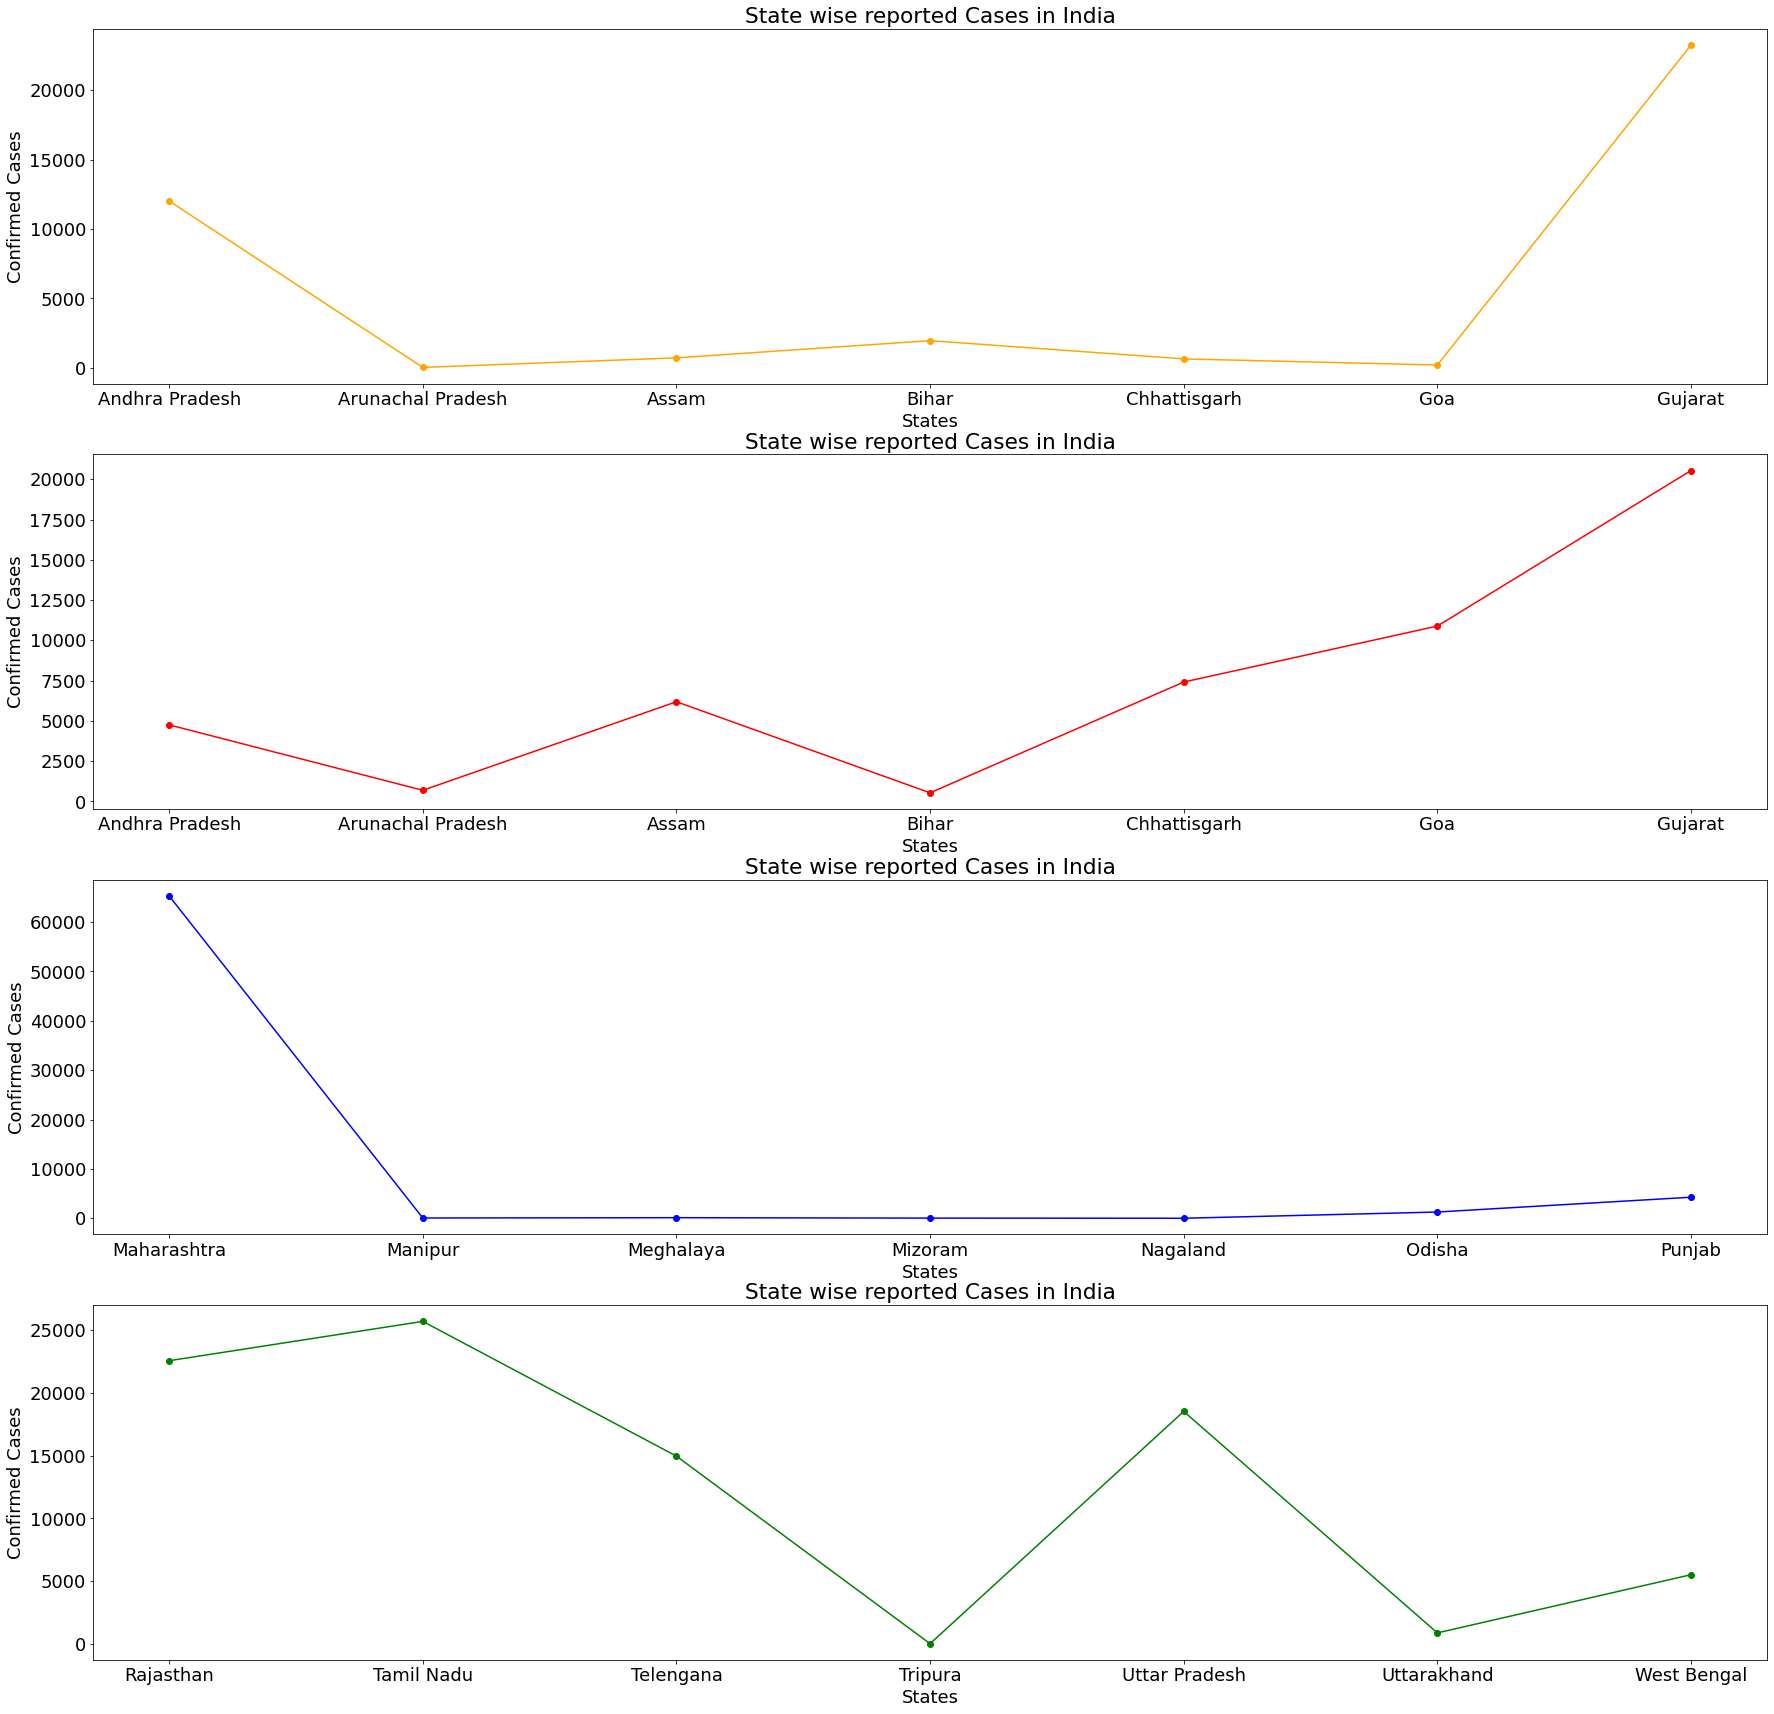

In [19]:

fig ,axes = plt.subplots(4,1,figsize=(30,30))
axes[0].plot(states1,India_state_covid_df[:7].Confirmed,marker='o',ls='-',color='orange')
axes[0].set_xlabel('States')
axes[0].set_ylabel('Confirmed Cases')
axes[0].set_title('State wise reported Cases in India');

axes[1].plot(states1,India_state_covid_df[7:14].Confirmed,'o-r')
axes[1].set_xlabel('States')
axes[1].set_ylabel('Confirmed Cases')
axes[1].set_title('State wise reported Cases in India');

axes[2].plot(states3,India_state_covid_df[14:21].Confirmed,'o-b')
axes[2].set_xlabel('States')
axes[2].set_ylabel('Confirmed Cases')
axes[2].set_title('State wise reported Cases in India');

axes[3].plot(states4,India_state_covid_df[21:28].Confirmed,'o-g')
axes[3].set_xlabel('States')
axes[3].set_ylabel('Confirmed Cases')
axes[3].set_title('State wise reported Cases in India');

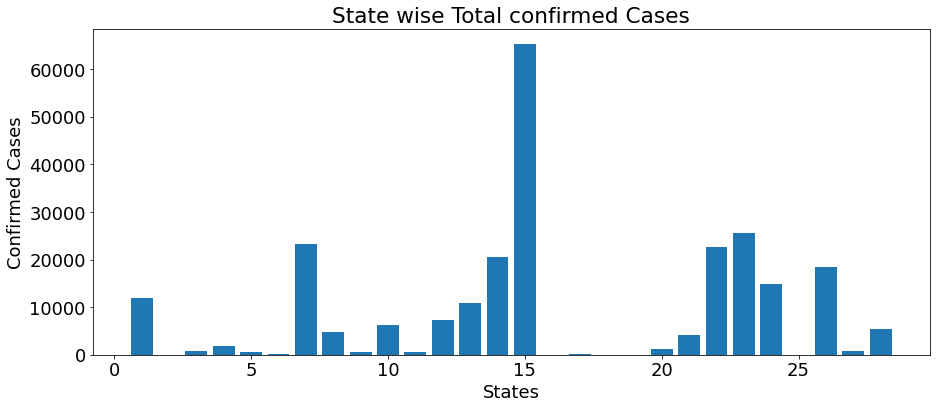

In [20]:
plt.figure(figsize=(15,6))
sns.set_style(style = None)
plt.bar(np.arange(1,29),India_state_covid_df.Confirmed)
plt.xlabel('States')
plt.ylabel('Confirmed Cases')
plt.title('State wise Total confirmed Cases');

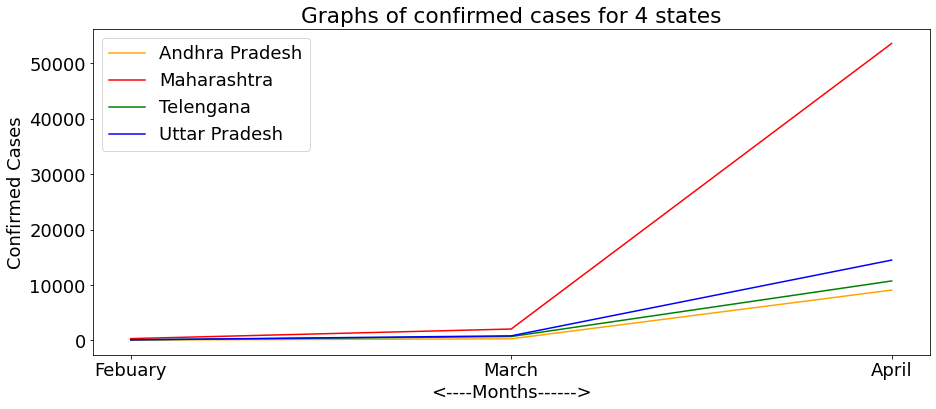

In [21]:
plt.figure(figsize=(15,6))
s1 = [India_covid19_states_feb_df.loc['Andhra Pradesh'].Confirmed,India_covid19_states_mar_df.loc['Andhra Pradesh'].Confirmed,
     India_covid19_states_apr_df.loc['Andhra Pradesh'].Confirmed]
s2 =  [India_covid19_states_feb_df.loc['Maharashtra'].Confirmed,India_covid19_states_mar_df.loc['Maharashtra'].Confirmed,
     India_covid19_states_apr_df.loc['Maharashtra'].Confirmed]
s3 =  [India_covid19_states_feb_df.loc['Telengana'].Confirmed,India_covid19_states_mar_df.loc['Telengana'].Confirmed,
     India_covid19_states_apr_df.loc['Telengana'].Confirmed]
s4 =  [India_covid19_states_feb_df.loc['Uttar Pradesh'].Confirmed,India_covid19_states_mar_df.loc['Uttar Pradesh'].Confirmed,
     India_covid19_states_apr_df.loc['Uttar Pradesh'].Confirmed]
plt.plot(['Febuary','March','April'],s1,color='orange')
plt.plot(['Febuary','March','April'],s2,'r')
plt.plot(['Febuary','March','April'],s3,'g')
plt.plot(['Febuary','March','April'],s4,'b')
plt.xlabel('<----Months------>')
plt.ylabel('Confirmed Cases')
plt.title('Graphs of confirmed cases for 4 states')
plt.legend(['Andhra Pradesh','Maharashtra','Telengana','Uttar Pradesh'])

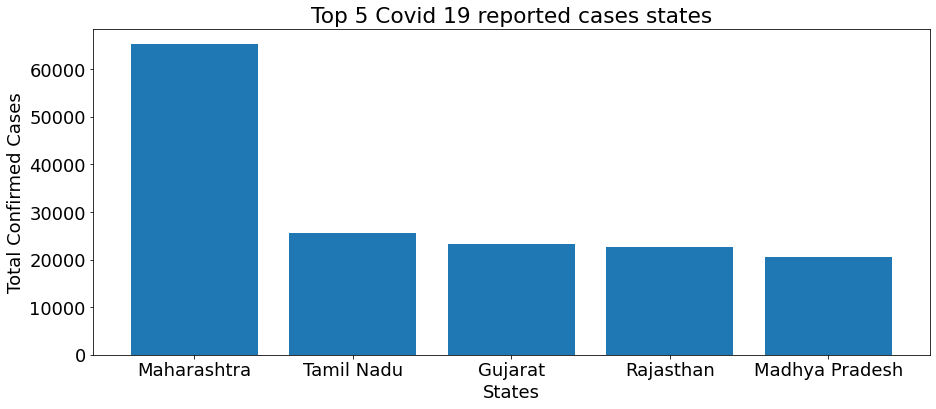

In [22]:
top_5_states = India_state_covid_df.sort_values('Confirmed',ascending=False).head()
least_5_states = India_state_covid_df.sort_values('Confirmed',ascending=False).tail()
plt.figure(figsize=(15,6))
plt.bar(['Maharashtra','Tamil Nadu','Gujarat','Rajasthan','Madhya Pradesh'],top_5_states.Confirmed)
plt.xlabel('States')
plt.ylabel('Total Confirmed Cases')
plt.title('Top 5 Covid 19 reported cases states');
         

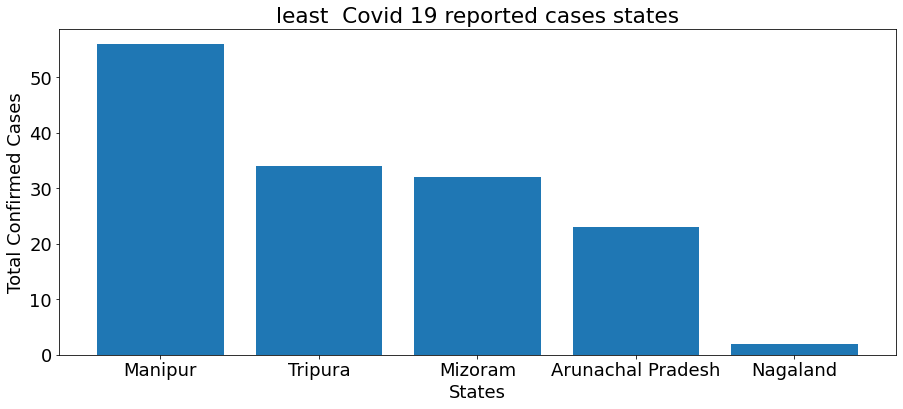

In [23]:
plt.figure(figsize=(15,6))
plt.bar(['Manipur','Tripura','Mizoram','Arunachal Pradesh','Nagaland'],least_5_states.Confirmed)
plt.xlabel('States')
plt.ylabel('Total Confirmed Cases')
plt.title('least  Covid 19 reported cases states');

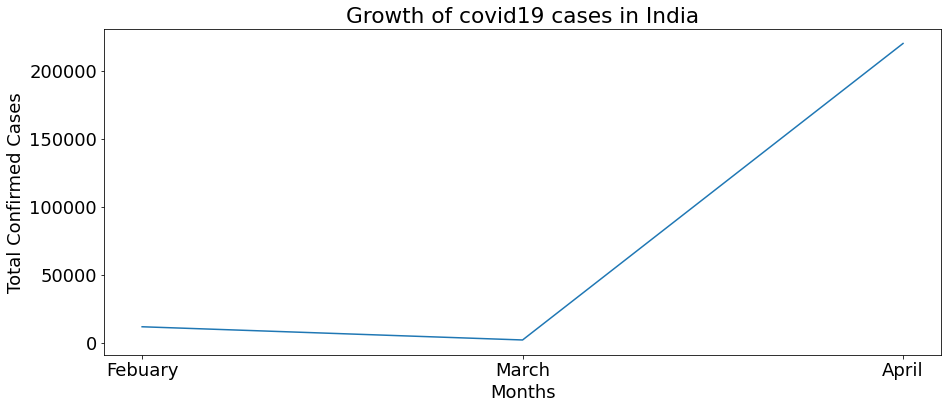

In [24]:
k = [India_covid19_states_mar_df.Confirmed.sum(),India_covid19_states_feb_df.Confirmed.sum(),
India_covid19_states_apr_df.Confirmed.sum()]
plt.figure(figsize=(15,6))
plt.plot(['Febuary','March','April'],k)
plt.xlabel('Months')
plt.ylabel('Total Confirmed Cases')
plt.title('Growth of covid19 cases in India');

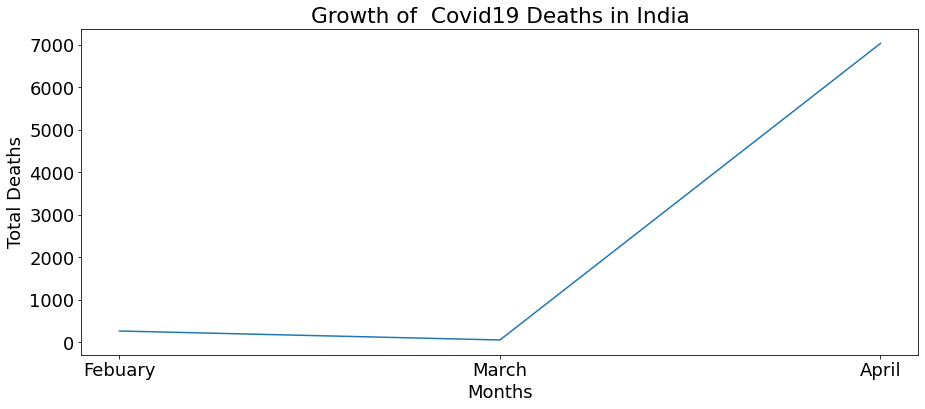

In [25]:
k = [India_covid19_states_mar_df.Deaths.sum(),India_covid19_states_feb_df.Deaths.sum(),
India_covid19_states_apr_df.Deaths.sum()]
plt.figure(figsize=(15,6))
plt.plot(['Febuary','March','April'],k)
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.title('Growth of  Covid19 Deaths in India');

In [26]:
import jovian

In [27]:
jovian.commit(files=['covid_19_india.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'

## Asking and Answering Questions

TODO

### Q1 Which state in India has highest no of cases and how much?

In [28]:
India_state_covid_df.sort_values('Confirmed',ascending=False).head()

,Cured,Confirmed,Deaths
State/UnionTerritory,,,
Maharashtra,7550,65266,3537
Tamil Nadu,5136,25677,268
Gujarat,1822,23240,1027
Rajasthan,2536,22549,208
Madhya Pradesh,1447,20542,1059


### Explanation
From the above data frame it is clear that ,Maharastra has highest number of cases in India. Maharashtra has 65266 Confirmed cases.

### np.sort_values()
The sort_values() function is used to sort by the values along either axis.

### syntax :

DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

### Q2 What are the total Confirmed cases In each State of India?

In [29]:
India_state_covid_df['Confirmed']


State/UnionTerritory
Andhra Pradesh       12008
Arunachal Pradesh       23
Assam                  711
Bihar                 1950
Chhattisgarh           637
Goa                    194
Gujarat              23240
Haryana               4748
Himachal Pradesh       685
Jammu and Kashmir     6184
Jharkhand              527
Karnataka             7408
Kerala               10883
Madhya Pradesh       20542
Maharashtra          65266
Manipur                 56
Meghalaya              116
Mizoram                 32
Nagaland                 2
Odisha                1264
Punjab                4261
Rajasthan            22549
Tamil Nadu           25677
Telengana            14957
Tripura                 34
Uttar Pradesh        18515
Uttarakhand            893
West Bengal           5521
Name: Confirmed, dtype: int64

### Explanation
Above dataset gives the statewise total Confirmed cases in India

### Q3 Top 5 states which has highest deaths?

                      Cured  Confirmed  Deaths
State/UnionTerritory                          
Maharashtra            7550      65266    3537
Madhya Pradesh         1447      20542    1059
Gujarat                1822      23240    1027
Telengana              2588      14957     349
Punjab                  510       4261     286


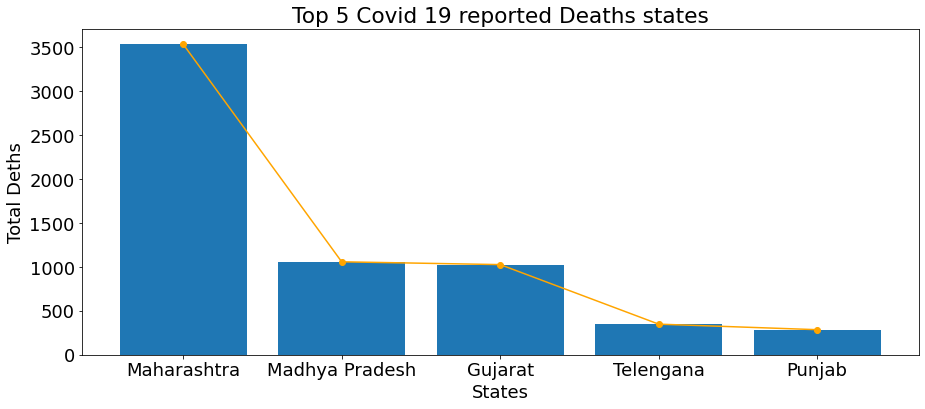

In [30]:
p = India_state_covid_df.sort_values('Deaths',ascending=False).head()
print(p)
plt.figure(figsize=(15,6))
plt.bar(['Maharashtra','Madhya Pradesh','Gujarat','Telengana','Punjab'],p.Deaths)
plt.plot(p.Deaths,marker='o',color='orange')
plt.xlabel('States')
plt.ylabel('Total Deths')
plt.title('Top 5 Covid 19 reported Deaths states');
         

### Explanation
Maharashtra has highest number of deaths followed by Madhya Pradesh,Gujarat,Telangana,Punjab

### Q4 Which day of the week has highest Average cases ?

weekday
0    32439
1    39271
2    43280
3    39745
4    52705
5    50726
6    24413
Name: Confirmed, dtype: int64


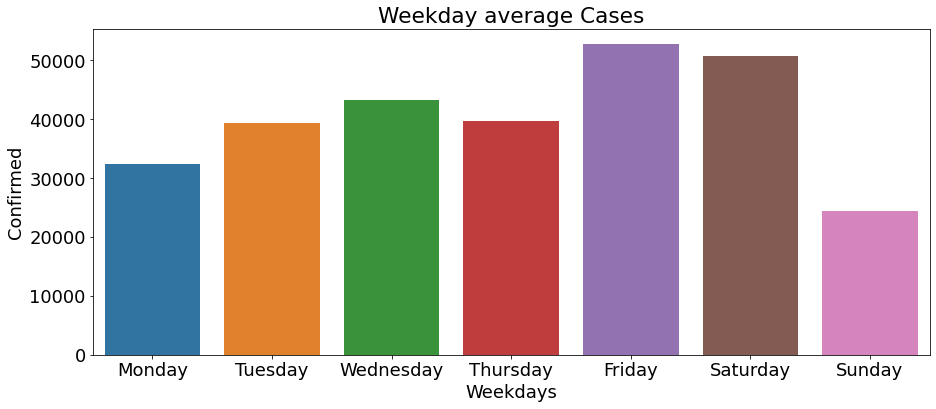

In [31]:
weekday_average = India_covid19_df.groupby('weekday')['Confirmed'].sum()
print(weekday_average)
plt.figure(figsize=(15,6))
weeks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(weeks,weekday_average);
plt.xlabel('Weekdays')
plt.title('Weekday average Cases');

### Explanation

From the bar plot is clear that On friday's highest Average cases has reported

### sns.barplot() 

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

###  Q5 How the Cases in India varies state wise?

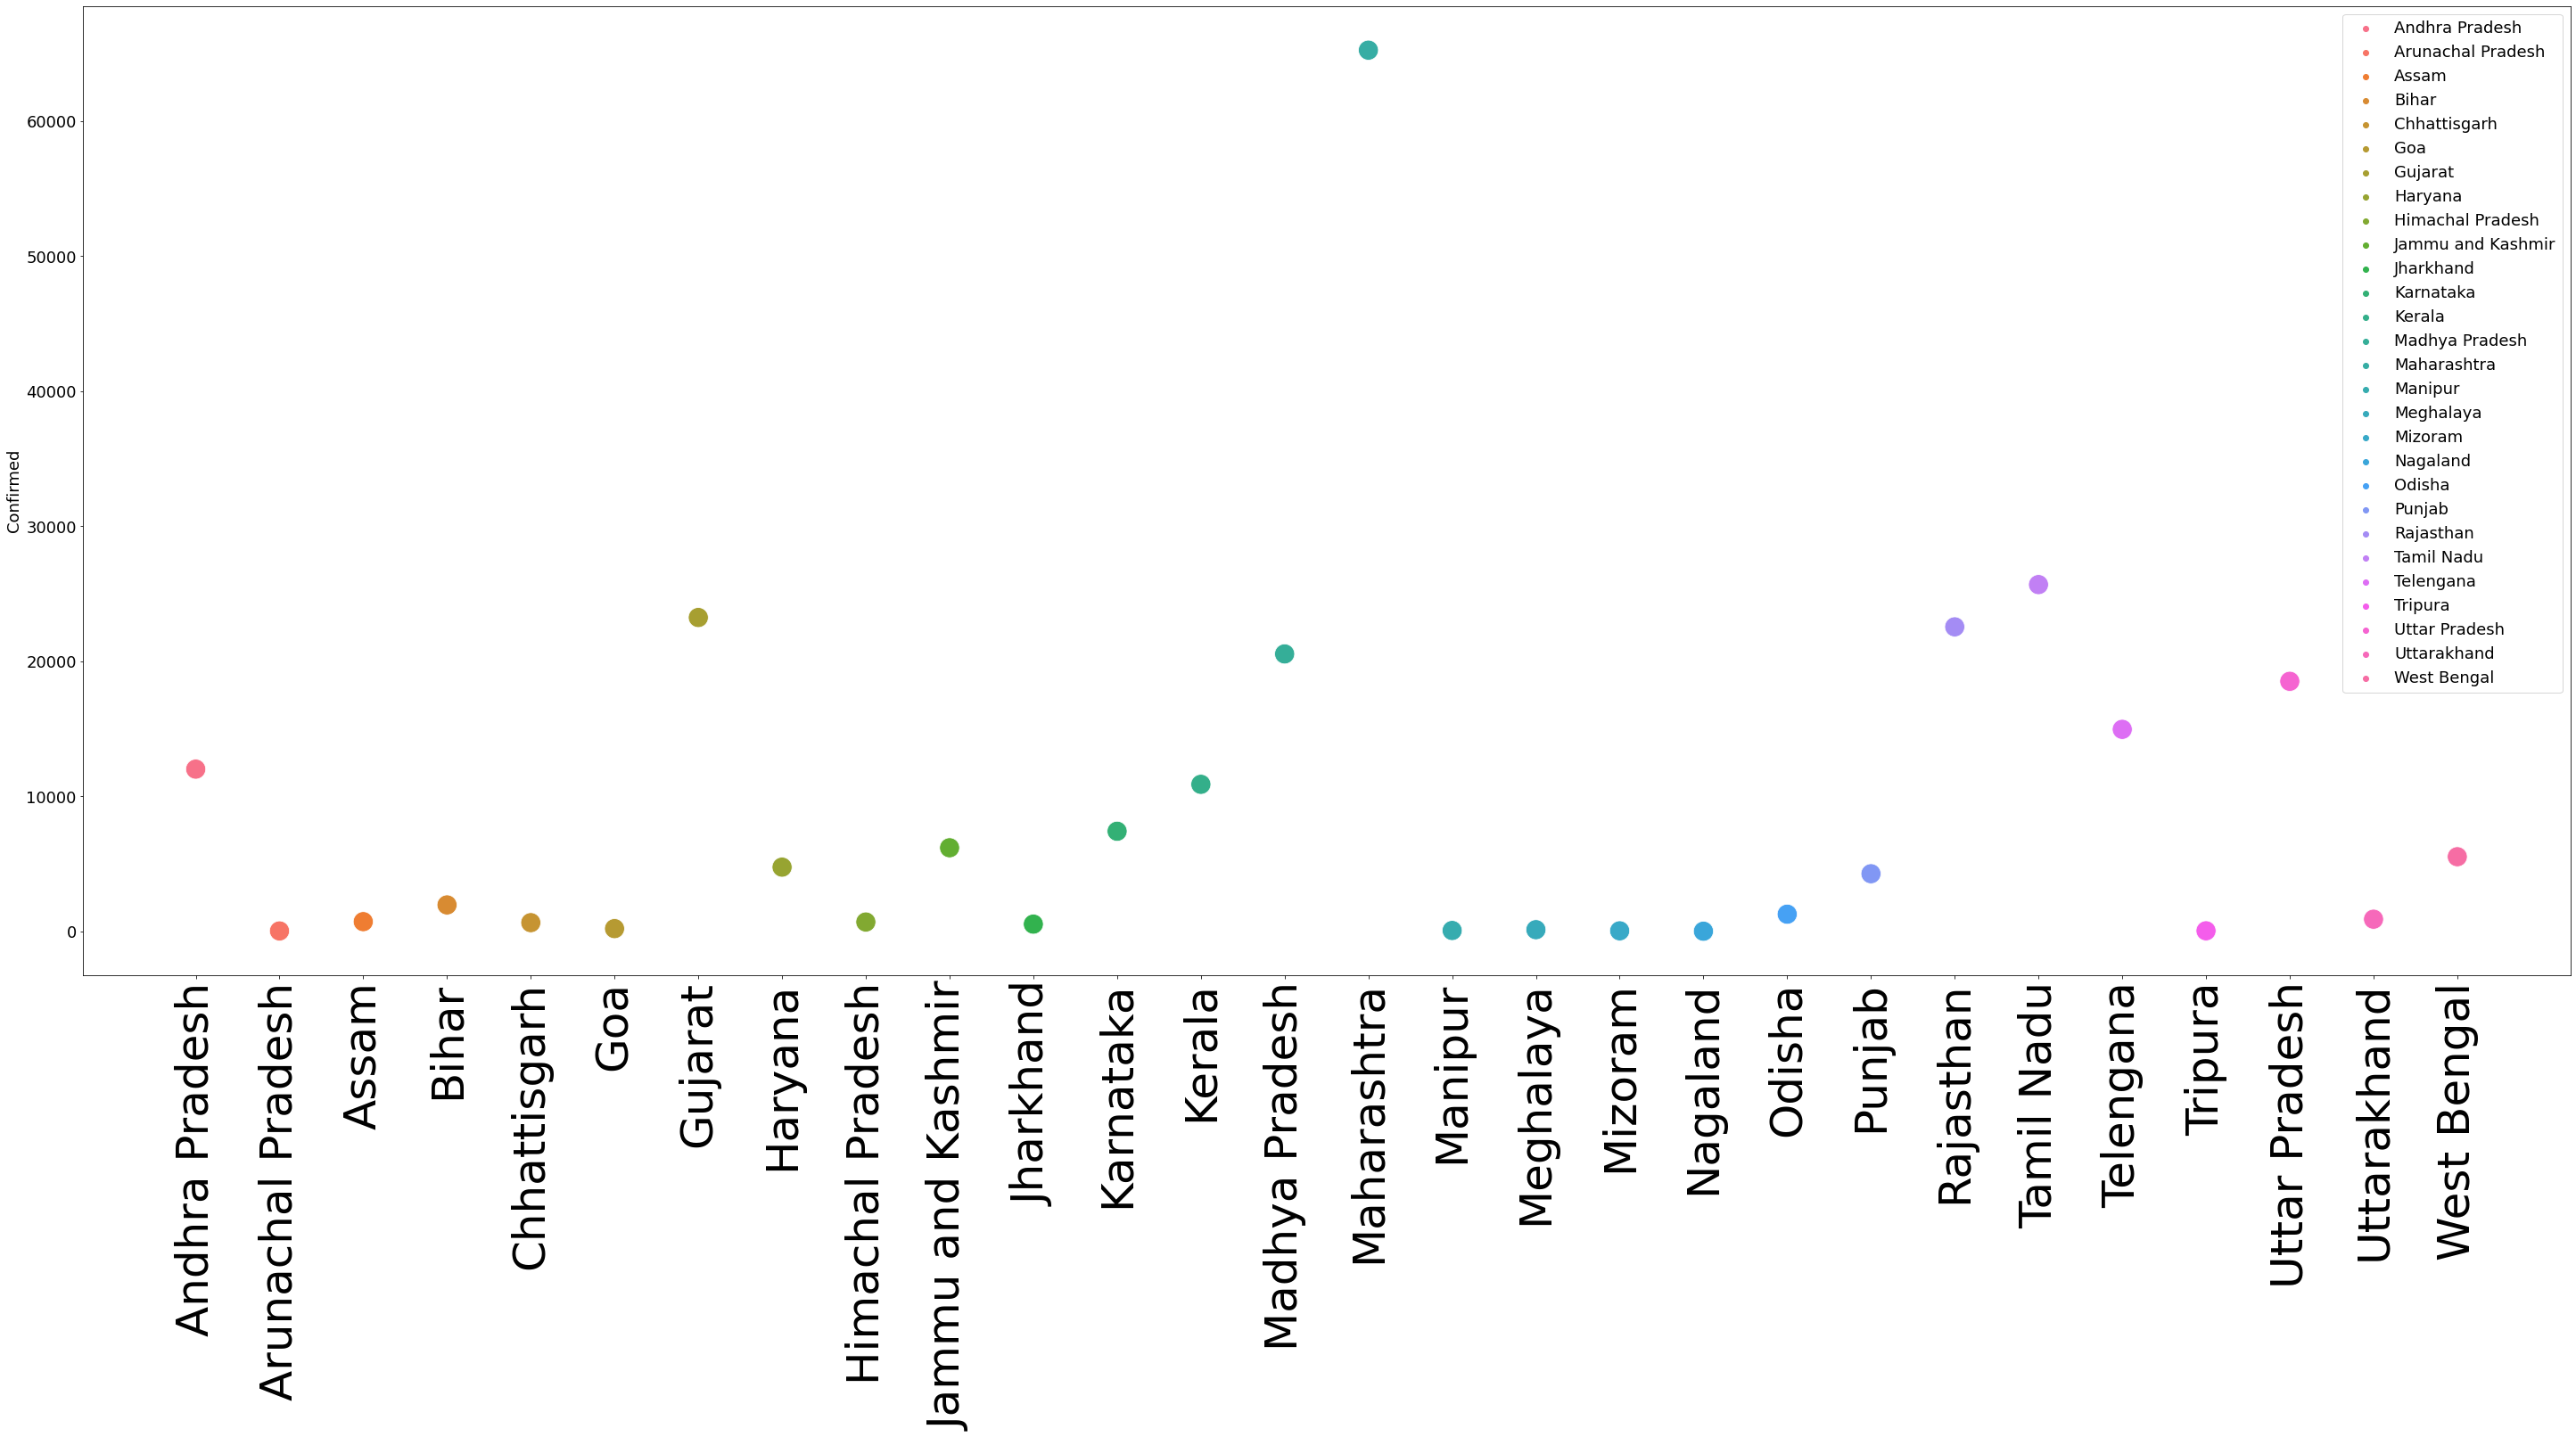

In [32]:
plt.figure(figsize=(50,20))
sns.scatterplot(states,India_state_covid_df.Confirmed,hue=states,s=500)
plt.xticks(rotation=90,fontsize=50);


### Explanation

Above scatterplot shows the how the cases Varies along States in India

### sns.scatterplot()

Scatter Plot represents the relationship between two continuous values, respectively. It depicts how one data variable gets affected by the other data variable in every fraction of the value of the data set.



In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'

## Inferences and Conclusion

TODO

The above analysis on the spread of covid19 in india is summarised as below:

Covid 19 cases are first sighted in the china in December.later the virus spread to almost every country in a short period of time.First case of covid sighted in india in kerala in the month febuary..

Covid 19 cases continued to raised over the months in India.Febuary month witnesed small fraction of cases and almost no deaths.But scenario changed when it comes to march and april.April has witnesed a huge raise in the cases and deaths..

States like Maharashtra ,Tamilnadu,Telangana,Gujarat,Uttarpradesh are badly effeted.North-Eastern states reported only fewer cases.

On fridays the highest average cases are reported.

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'

## References and Future Work

TODO

### Future work
The dataset for covid19 analysis considered only state wise confirmed,cured,deaths only.There is much more to explore.

If gender,age,health history,population,location is considered then it would become more interesting.Merging further more data to the existing dataset would help in giving the precise analysis & root cause for the spread of coronavirus in India.

### References

Data Analysis from zero to pandas https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

Visualization with Matplotlib and Seaborn https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn

Data Analysis course discussion form https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684/98

 Analyzing Tabular Data with Pandas https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas
 
 Numerical Computing with Numpy https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-3-numerical-computing-with-numpy

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "angajalasaisri2000/covid19-analysis-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india


'https://jovian.ml/angajalasaisri2000/covid19-analysis-in-india'